## Random Forest 

In [1]:
from dataset import Dataset
import skimage as ski
import numpy as np
from sklearn.ensemble import RandomForestClassifier

2025-04-28 10:28:42.044254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745828923.166583   27572 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745828923.465569   27572 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745828925.814325   27572 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745828925.814362   27572 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745828925.814364   27572 computation_placer.cc:177] computation placer alr

In [2]:
INPUT_DIR = "../data/train/tiles/"
TARGET_DIR = "../data/train/masks/"

In [3]:
dataset = Dataset(INPUT_DIR, TARGET_DIR)

In [4]:
input_img, target_img = dataset[10]
input_img.dtype

dtype('uint16')

In [5]:
np.unique(target_img)

array([0, 1], dtype=uint8)

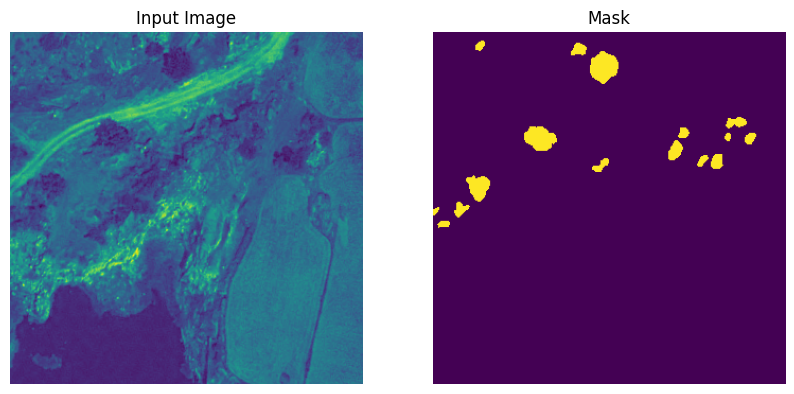

In [6]:
input_img = ski.img_as_float(input_img)
target_img = ski.img_as_float(target_img)

dataset.display(input_img, target_img, 10, 1, is_resize=False)

In [7]:
train, val = dataset.train_test_val_split(val_ratio=0.2)

In [8]:
feature_vector = dataset.get_feature_vector(10)
feature_vector.shape
feature_vector.dtype

dtype('uint16')

In [9]:
label = dataset.get_label(10, is_resize=True)
label.shape

(128, 128)

In [10]:
np.unique(label)

array([0, 1], dtype=uint8)

In [11]:
X_train, y_train, X_val, y_val = dataset.get_feature_vector_and_labels()
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((4325376, 9), (4325376, 1), (1081344, 9), (1081344, 1))

In [12]:
clf = RandomForestClassifier(max_depth=15, random_state=42)

In [13]:
# clf.fit(X_train, y_train)

In [14]:
import joblib
# joblib.dump(clf, "./random_forest_2.joblib")
clf = joblib.load("../results/random_forest_2.joblib")

In [15]:
prediction  = clf.predict(X_val)
prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(1081344,), dtype=uint8)

In [16]:
clf.score(X_val, y_val)

0.779815673828125

In [17]:
train, val = dataset.train_test_val_split()

In [18]:
tiles_val = dataset.calculate_feature_vector(val)
labels_val = dataset.get_labels(val)

In [19]:
tiles_val.shape, labels_val.shape

((66, 9, 128, 128), (66, 128, 128))

In [20]:
tiles_val[0].shape, labels_val[0].shape

((9, 128, 128), (128, 128))

In [21]:
X_test = tiles_val[0].transpose(0, 2, 1).reshape(-1, 9)

In [22]:
y_test = labels_val[0].transpose(0, 1).reshape(-1, 1)

In [23]:
prediction = clf.predict(X_test)
prediction.shape

(16384,)

In [24]:
prediction_mask = prediction.reshape(-1, 128)
prediction_mask.shape

(128, 128)

In [25]:
tiles = tiles_val[0]
tiles.dtype

dtype('uint16')

In [26]:

mask = y_test.reshape(-1, 128)
mask.dtype

dtype('uint8')

In [27]:
def calculate_iou(mask1, mask2, batch_size=1000):
    height, width = mask1.shape
    iou_total = 0.0
    num_batches = (height + batch_size - 1) // batch_size
    
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, height)
        
        batch1 = mask1[start:end]
        batch2 = mask2[start:end]
        
        intersection = np.logical_and(batch1, batch2).sum()
        union = np.logical_or(batch1, batch2).sum()
        
        if union > 0:
            iou_total += intersection / union
    
    return iou_total / num_batches

In [28]:
calculate_iou(prediction_mask, mask)

np.float64(0.05741785595751742)

In [29]:
tiles.shape

(9, 128, 128)

In [30]:
mask.shape

(128, 128)

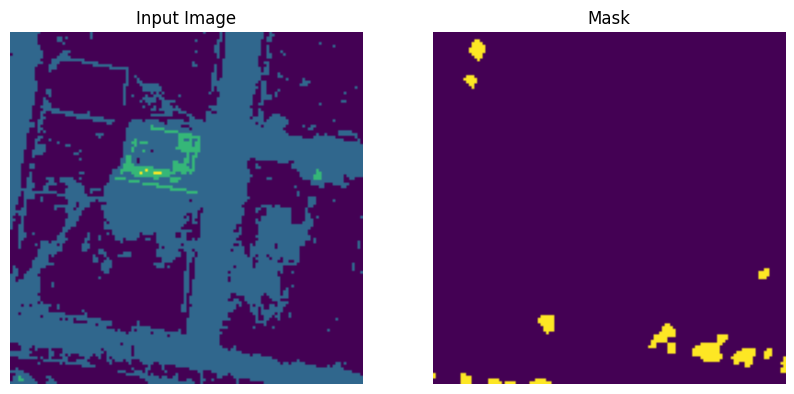

In [31]:
dataset.display(tiles, mask, 10, 1, is_resize=False)

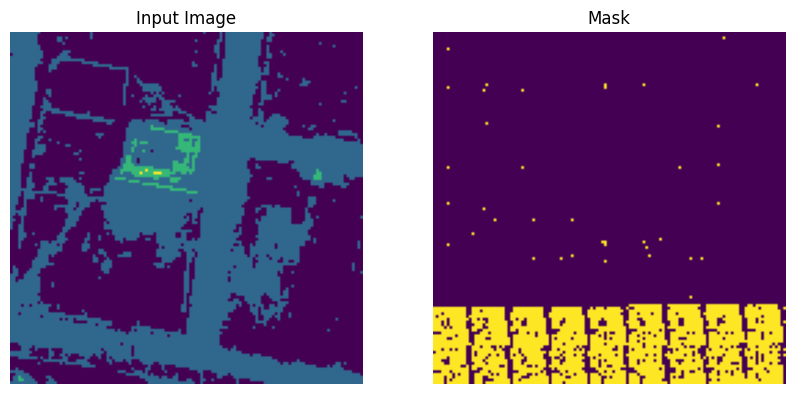

In [32]:
dataset.display(tiles, prediction_mask, 10, 1, is_resize=False)


In [ ]:
dataset.display_img(tiles, mask, prediction_mask, 10, 1, is_resize=False)

In [33]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score, recall_score

In [34]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13371  2695]
 [  145   173]]


In [35]:

# Compute balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, prediction)
balanced_acc


np.float64(0.6881398038124185)

In [36]:

# Compute precision
precision = precision_score(y_test, prediction, zero_division=0)
precision


0.0603207810320781

In [37]:

# Compute recall
recall = recall_score(y_test, prediction, zero_division=0)
recall

0.5440251572327044

In [38]:
TARGET_TEST_DIR = "../data/worldview_test/mask"
INPUT_TEST_DIR = "../data/worldview_test/tile"

In [39]:
test_dataset = Dataset(INPUT_TEST_DIR, TARGET_TEST_DIR)

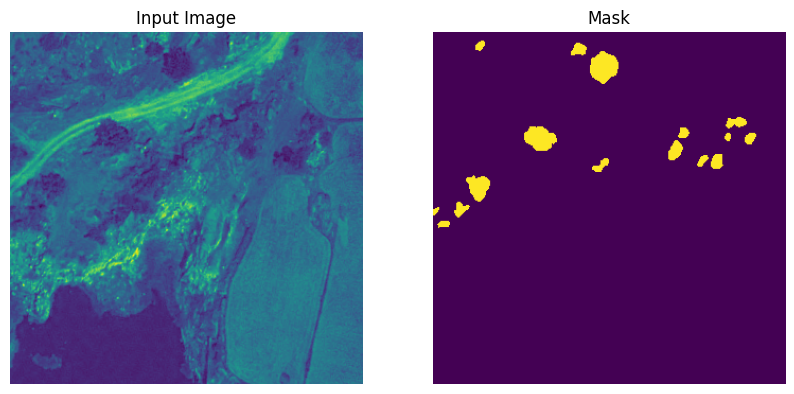

In [40]:
test_dataset.display(input_img, target_img, 10, 1, is_resize=False)

In [41]:
X_tests, y_tests = test_dataset.get_feature_vector_and_labels(split=False, is_crop=True)

/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:223: RuntimeWarning: divide by zero encountered in divide
  plants_band = ((red_edge_band - red_band) / (red_edge_band + red_band))
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:223: RuntimeWarning: invalid value encountered in divide
  plants_band = ((red_edge_band - red_band) / (red_edge_band + red_band))
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:238: RuntimeWarning: invalid value encountered in cast
  plants_band.astype(np.uint16),
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:223: RuntimeWarning: divide by zero encountered in divide
  plants_band = ((red_edge_band - red_band) / (red_edge_band + red_band))
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:238: RuntimeWarning: invalid value encountered in cast
  plants_band.astype(np.uint16),
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:223: RuntimeWarning: divide by zero encountered in divide

In [42]:
clf.score(X_tests, y_tests)

0.796981148097826

In [43]:
prediction_tests = clf.predict(X_tests)

In [44]:
conf_matrix = confusion_matrix(y_tests, prediction_tests)
conf_matrix

array([[297134,  14887],
       [ 61617,   3194]])

In [45]:
balanced_acc = balanced_accuracy_score(y_tests, prediction_tests)
balanced_acc

np.float64(0.5007851127448498)

In [46]:
precision = precision_score(y_tests, prediction_tests, zero_division=0)
precision

0.17664952159725678

In [47]:
recall = recall_score(y_tests, prediction_tests, zero_division=0)
recall

0.04928175772631189

In [48]:
def calculate_iou(mask1, mask2, batch_size=1000):
    height, width = mask1.shape
    iou_total = 0.0
    num_batches = (height + batch_size - 1) // batch_size
    
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, height)
        
        batch1 = mask1[start:end]
        batch2 = mask2[start:end]
        
        intersection = np.logical_and(batch1, batch2).sum()
        union = np.logical_or(batch1, batch2).sum()
        
        if union > 0:
            iou_total += intersection / union
    
    return iou_total / num_batches

In [49]:
iou = calculate_iou(y_tests, prediction_tests)
iou

np.float64(0.027063394294960505)

In [50]:
tiles = dataset.get_feature_vector(0, is_crop=True)
tiles.shape

/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:223: RuntimeWarning: divide by zero encountered in divide
  plants_band = ((red_edge_band - red_band) / (red_edge_band + red_band))
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:223: RuntimeWarning: invalid value encountered in divide
  plants_band = ((red_edge_band - red_band) / (red_edge_band + red_band))
/mnt/c/Users/rizki/Master Files/DL_in_forestry/src/dataset.py:238: RuntimeWarning: invalid value encountered in cast
  plants_band.astype(np.uint16),


(9, 128, 128)

In [51]:
mask = dataset.get_label(0, is_crop=True)
mask.shape

(128, 128)

In [52]:
prediction_mask = clf.predict(tiles.reshape(-1, 9))

In [53]:
prediction_mask_img = prediction_mask.reshape(-1, 128)

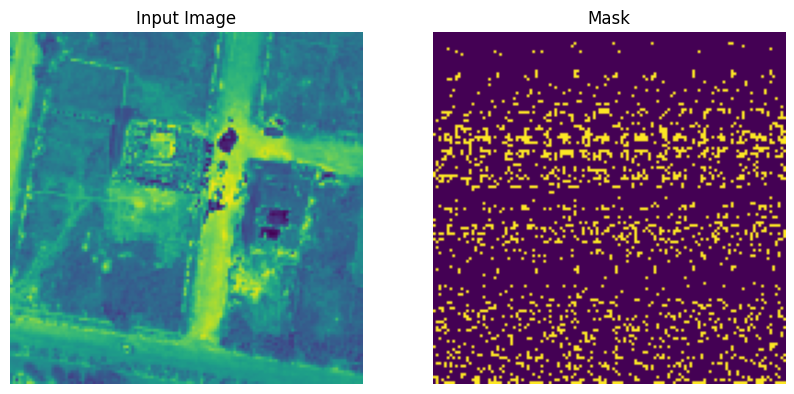

In [54]:
dataset.display(tiles, prediction_mask_img, 10, 1, is_resize=False)

IoU for image 10: 2.0168


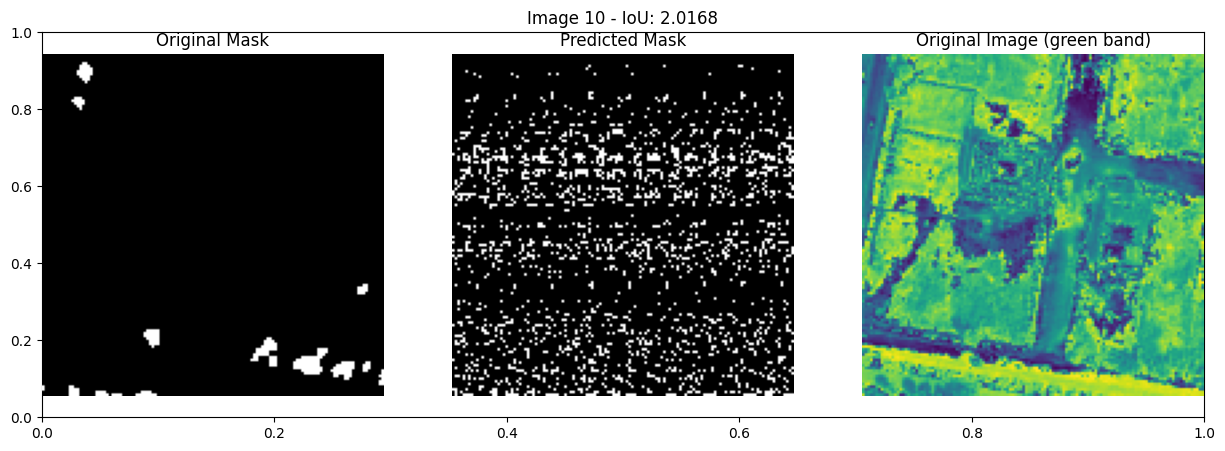

In [55]:
dataset.display_img(tiles, mask, prediction_mask_img, 10, 1, is_resize=False)